In [327]:
import sys
import os

os.chdir("../")

os.getcwd()

'c:\\'

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
#DR Methods
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE, spectral_embedding
import umap
import pacmap
import trimap
#Clustering Methods
from sklearn.cluster import KMeans, DBSCAN, MeanShift, Birch, estimate_bandwidth
#import HDBSCAN
from scipy.spatial.distance import pdist, squareform

Data Preprocessing

In [329]:
#Load Data
df = pd.read_excel('C:\\Users\kterri3\Documents\Git Repositories\hw\CHE4230HW\che4230_hw\Project Stuff\RawData.xlsx')
# print(df)

In [330]:
#Fill empty data with mean values
df.describe()
df.shape
df.isnull().sum().sum()
df_mean = df.fillna(df.mean(), inplace= True)
df.isnull().sum().sum()
df_drop_dup = df.drop_duplicates()
df.fillna(0)

,Unnamed: 0,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
0,1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,...,26.662173,60.482854,0,24.229301,37.208198,46.430526,0,35.865322,12.930642,100
1,2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,...,26.689544,60.524644,0,24.171763,37.227431,46.427192,0,35.719177,11.714423,100
2,3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,...,26.705507,60.546193,0,25.179022,37.243766,46.442544,0,35.740715,10.734676,100
3,4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,...,26.768653,60.568588,0,26.922729,37.211698,46.407497,0,35.736154,10.311783,100
4,5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,...,26.396773,60.637598,0,29.039605,37.199517,46.424034,0,35.890716,11.181380,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1991,-0.001158,3744.190299,4863.374473,8.792891,24.901362,40.390117,2903.201084,66.243082,122.882878,...,100.000000,57.399858,0,100.000000,41.244686,45.466296,0,30.171207,22.898173,100
1991,1992,-0.001147,3798.451896,4864.787808,8.814539,24.783557,40.401312,2911.912112,68.055534,122.881328,...,100.000000,57.365210,0,100.000000,41.463254,45.413515,0,30.066018,26.035429,100
1992,1993,-0.000370,3774.038558,4891.309364,8.659021,24.805757,40.107094,2922.391028,67.415723,122.888396,...,100.000000,57.415508,0,100.000000,41.700081,45.373462,0,30.117846,25.214501,100
1993,1994,-0.000925,3812.197101,4909.631048,8.724842,24.877275,40.463346,2931.150717,67.685917,122.890874,...,100.000000,57.280676,0,100.000000,41.954073,45.361655,0,29.900523,25.175145,100


In [331]:
#df = df.drop(labels=[1])
#df.shape

In [332]:
x_train, x_test = train_test_split(df, test_size = 0.2, random_state=42)
x_train2, x_val = train_test_split(x_train, test_size = 0.2, random_state=42)

print(len(x_train2))
print(len(x_test))
print(len(x_val))

1276
399
320


In [333]:
#scaler = StandardScaler().fit(x_train2)
#df_scaled = scaler.transform(x_train2)
#df_scaled

In [334]:
scaler = StandardScaler().fit(df)
df_scaled = scaler.transform(df)
df_scaled

array([[-1.73118283,  0.08664536, -0.50970249, ..., -0.10066195,
         0.21032273,  0.        ],
       [-1.72944644,  0.08484114, -0.3665744 , ..., -0.28157158,
        -0.37472402,  0.        ],
       [-1.72771005,  0.08177297,  1.01491127, ..., -0.25491056,
        -0.84601891,  0.        ],
       ...,
       [ 1.72771005, -2.27822554,  4.42876952, ..., -7.21537558,
         6.11931653,  0.        ],
       [ 1.72944644, -2.28305604,  5.94482899, ..., -7.48439682,
         6.1003848 ,  0.        ],
       [ 1.73118283, -2.27776132,  3.94805948, ..., -7.66535196,
         5.44054313,  0.        ]])

Using PCA with Clustering

Text(0.5, 1.0, 'Principal Component Analysis')

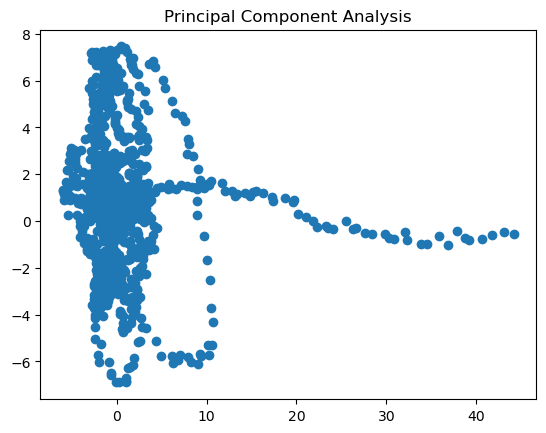

In [335]:
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_scaled)

plt.scatter(df_pca[:,0], df_pca[:,1])
plt.title("Principal Component Analysis")

[0 0 0 ... 1 1 1]


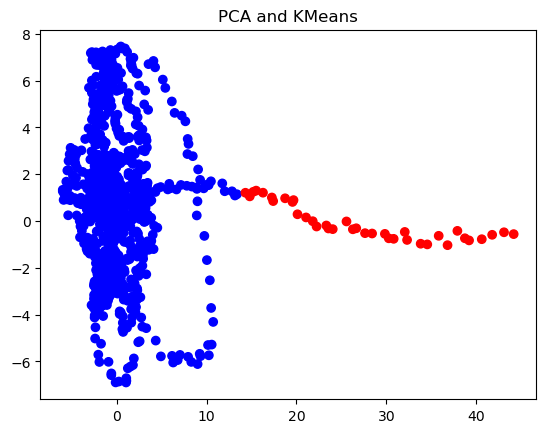

In [336]:
#PCA and KMEANS
pca_kmean_model = KMeans(n_clusters = 2)
pca_kmean_model.fit(df_pca)
pca_kmean_labels = pca_kmean_model.labels_
centroids = pca_kmean_model.cluster_centers_
print(pca_kmean_labels)

# colors for plotting
colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','teal','silver', 'yellow','purple','pink']
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[pca_kmean_labels[i]] for i in range(len(df_pca)) ]

plt.scatter(df_pca[:,0], df_pca[:,1],c=features_colors,marker='o')
plt.title("PCA and KMeans")
plt.show()

Text(0.5, 1.0, 'PCA and DBSCAN')

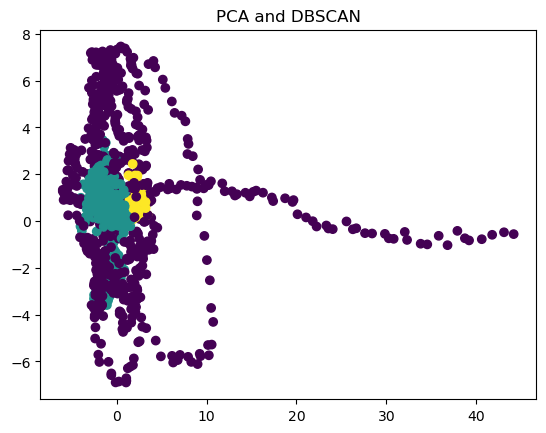

In [337]:
#PCA and DBSCAN
pca_dbscan_model = DBSCAN(eps = 1, min_samples = 15)
pca_dbscan_model.fit(df_pca)
pca_dbscan_labels = pca_dbscan_model.labels_
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = pca_dbscan_labels)
plt.title("PCA and DBSCAN")

Text(0.5, 1.0, 'PCA and Birch')

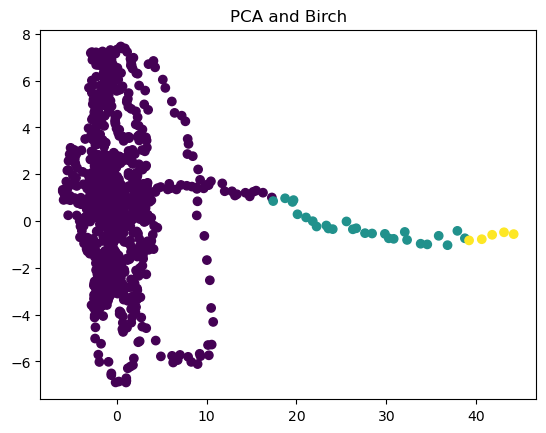

In [338]:
#PCA and Birch
pca_birch_model = Birch(branching_factor = 50, n_clusters = None, threshold = 5)
pca_birch_model.fit(df_pca)
pca_birch_labels = pca_birch_model.labels_
pca_birch_pred = pca_birch_model.predict(df_pca)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = pca_birch_pred)
plt.title("PCA and Birch")

Using tSNE with Clustering 

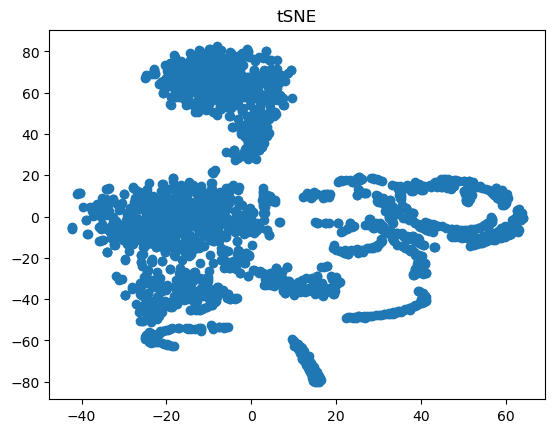

In [339]:
#using tSNE
tsne = TSNE(n_components = 2,learning_rate = 750, init = 'random')
df_tsne = tsne.fit_transform(df_scaled)

plt.scatter(df_tsne[:,0], df_tsne[:,1])
plt.title("tSNE")
plt.show()

[2 2 2 ... 0 0 0]


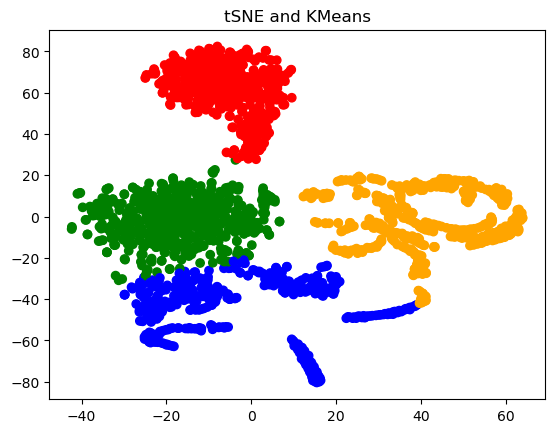

In [340]:
#tSNE and KMEANS
tsne_kmean_model = KMeans(n_clusters = 4)
tsne_kmean_model.fit(df_tsne)
tsne_kmean_labels = tsne_kmean_model.labels_
centroids = tsne_kmean_model.cluster_centers_
print(tsne_kmean_labels)

# colors for plotting
colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','teal','silver', 'yellow','purple','pink']
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[tsne_kmean_labels[i]] for i in range(len(df_tsne)) ]

plt.scatter(df_tsne[:,0], df_tsne[:,1],c=features_colors,marker='o')
plt.title("tSNE and KMeans")
plt.show()

c:\Users\kterri3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


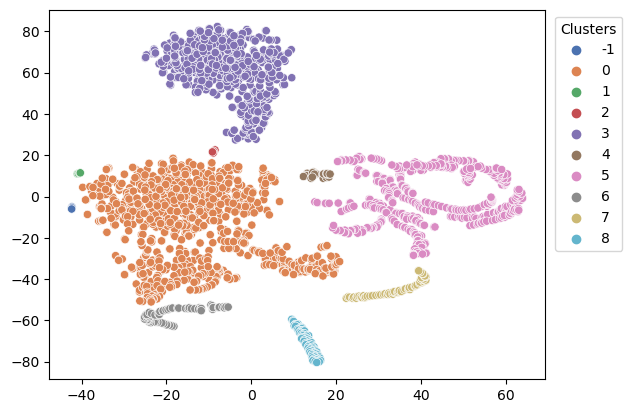

In [341]:
#tSNE and DBScan
tsne_dbscan_model = DBSCAN(eps = 4.54, min_samples = 4).fit(df_tsne)
tsne_dbscan_labels = tsne_dbscan_model.labels_
set(tsne_dbscan_model.labels_)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
import seaborn as sns
import matplotlib.pyplot as plt

tsne_p = sns.scatterplot(df_tsne[:,0], df_tsne[:,1], hue = tsne_dbscan_model.labels_, legend = "full", palette = "deep")
sns.move_legend(tsne_p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

Text(0.5, 1.0, 'tSNE and Birch')

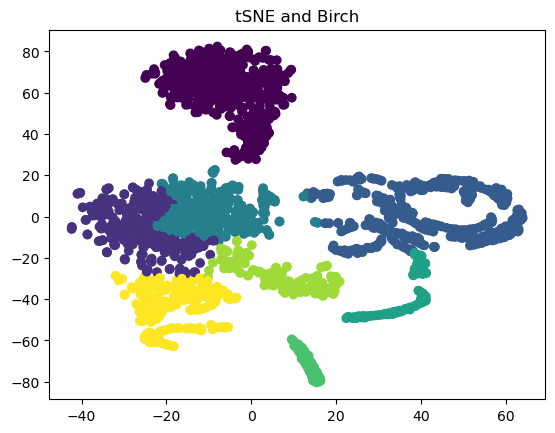

In [342]:
#tSNE and Birch
tsne_birch_model = Birch(branching_factor = 50, n_clusters = 8, threshold = 10)
tsne_birch_model.fit(df_tsne)
tsne_birch_labels = tsne_birch_model.labels_
tsne_birch_pred = tsne_birch_model.predict(df_tsne)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c = tsne_birch_pred)
plt.title("tSNE and Birch")

ICA and Clustering

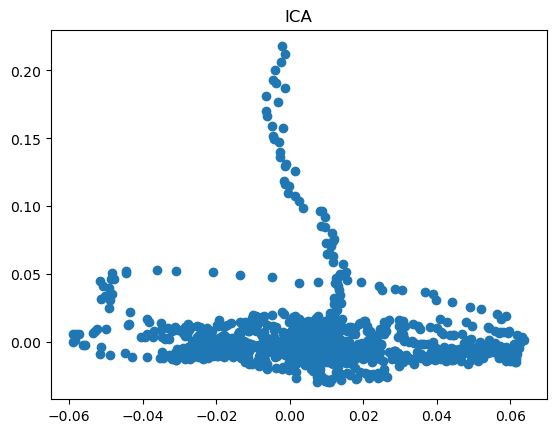

In [343]:
#using ICA
ica = FastICA(n_components = 2)
df_ica = ica.fit_transform(df_scaled)

plt.scatter(df_ica[:,0], df_ica[:,1])
plt.title("ICA")
plt.show()

[0 0 0 ... 2 2 2]


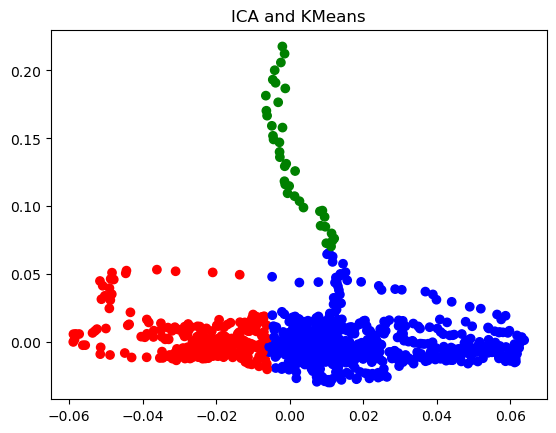

In [344]:
#ICA and KMEANS
ica_kmean_model = KMeans(n_clusters = 3)
ica_kmean_model.fit(df_ica)
ica_kmean_labels = ica_kmean_model.labels_
centroids = ica_kmean_model.cluster_centers_
print(ica_kmean_labels)

# colors for plotting
ica_kmeans_colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','teal','silver', 'yellow','purple','pink']
# assign a color to each features (note that we are using features as target)
ica_kmeans_features_colors = [ ica_kmeans_colors[ica_kmean_labels[i]] for i in range(len(df_ica)) ]

plt.scatter(df_ica[:,0], df_ica[:,1],c=ica_kmeans_features_colors,marker='o')
plt.title("ICA and KMeans")
plt.show()

c:\Users\kterri3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


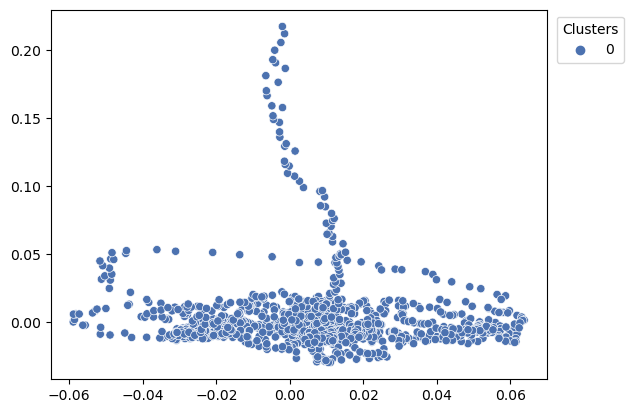

In [345]:
#ICA and DBScan
ica_dbscan_model = DBSCAN().fit(df_ica)
ica_dbscan_labels = ica_dbscan_model.labels_
set(ica_dbscan_model.labels_)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
import seaborn as sns
import matplotlib.pyplot as plt

ica_p = sns.scatterplot(df_ica[:,0], df_ica[:,1], hue = ica_dbscan_model.labels_, legend = "full", palette = "deep")
sns.move_legend(ica_p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

Text(0.5, 1.0, 'ICA and Birch')

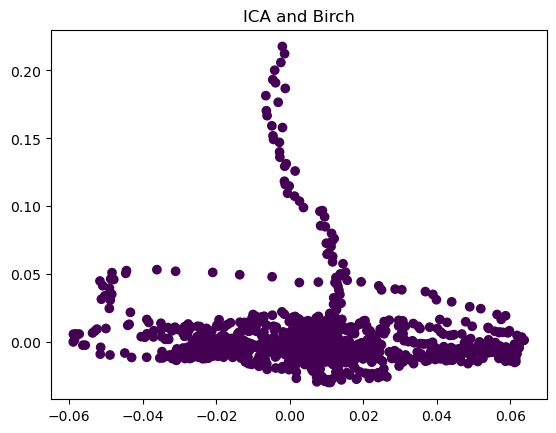

In [361]:
#ICA and Birch
ica_birch_model = Birch(branching_factor = 50, n_clusters = 2, threshold = 0.0005)
ica_birch_model.fit(df_ica)
tsne_birch_labels = ica_birch_model.labels_
ica_birch_pred = tsne_birch_model.predict(df_ica)
plt.scatter(df_ica[:, 0], df_ica[:, 1], c = ica_birch_pred)
plt.title("ICA and Birch")

PaCMAP and Clustering

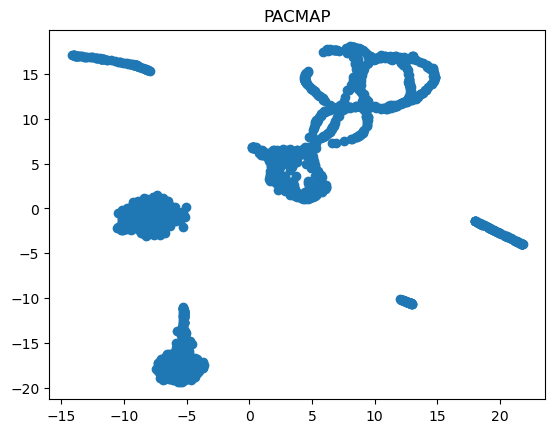

In [347]:
#using PACMAP
pacmap = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0)
df_pacmap = pacmap.fit_transform(df_scaled)

plt.scatter(df_pacmap[:,0], df_pacmap[:,1])
plt.title("PACMAP")
plt.show()

[0 0 0 ... 3 3 3]


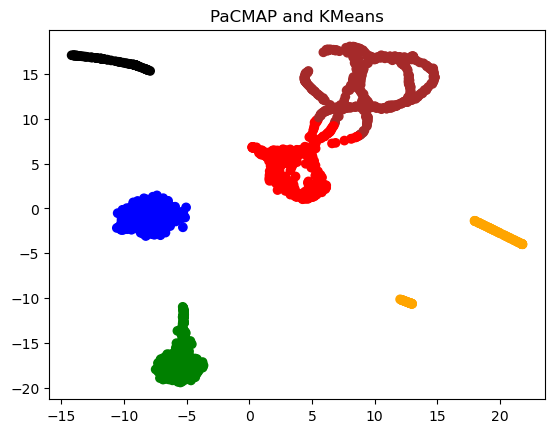

In [348]:
#PACMAP and KMEANS
pacmap_kmean_model = KMeans(n_clusters = 6)
pacmap_kmean_model.fit(df_pacmap)
pacmap_kmean_labels = pacmap_kmean_model.labels_
centroids = pacmap_kmean_model.cluster_centers_
print(pacmap_kmean_labels)

# colors for plotting
pacmap_kmeans_colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','teal','silver', 'yellow','purple','pink']
# assign a color to each features (note that we are using features as target)
pacmap_kmeans_features_colors = [ pacmap_kmeans_colors[pacmap_kmean_labels[i]] for i in range(len(df_pacmap)) ]

plt.scatter(df_pacmap[:,0], df_pacmap[:,1],c=pacmap_kmeans_features_colors,marker='o')
plt.title("PaCMAP and KMeans")
plt.show()

[0 0 0 ... 5 5 5]


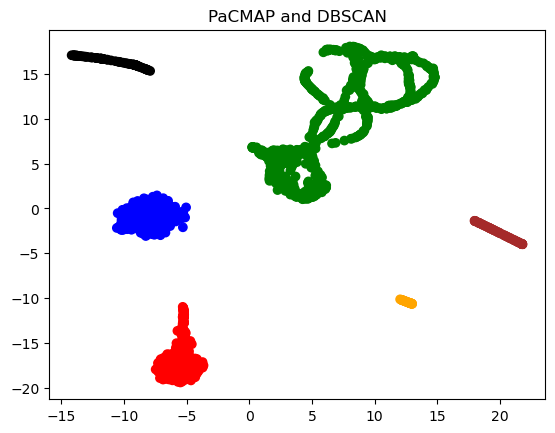

In [349]:
#PACMAP and DBSCAN
pacmap_dbscan_model = DBSCAN(eps = 4.54, min_samples = 4)
pacmap_dbscan_model.fit(df_pacmap)
pacmap_dbscan_labels = pacmap_dbscan_model.labels_
#centroids = pacmap_dbscan_model.cluster_centers_
print(pacmap_dbscan_labels)

# colors for plotting
pacmap_dbscan_colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','teal','silver', 'yellow','purple','pink']
# assign a color to each features (note that we are using features as target)
pacmap_dbscan_features_colors = [ pacmap_dbscan_colors[pacmap_dbscan_labels[i]] for i in range(len(df_pacmap)) ]

plt.scatter(df_pacmap[:,0], df_pacmap[:,1],c=pacmap_dbscan_features_colors,marker='o')
plt.title("PaCMAP and DBSCAN")
plt.show()


Text(0.5, 1.0, 'PaCMAP and Birch')

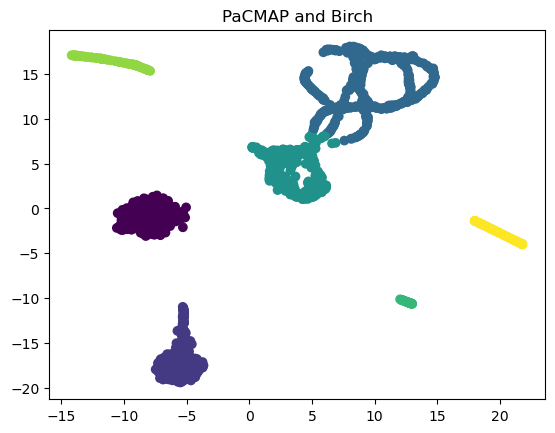

In [351]:
#PACMAP and Birch
pacmap_birch_model = Birch(branching_factor = 10, n_clusters = None, threshold = 5)
pacmap_birch_model.fit(df_pacmap)
pacmap_birch_labels = pacmap_birch_model.labels_
pacmap_birch_pred = pacmap_birch_model.predict(df_pacmap)
plt.scatter(df_pacmap[:, 0], df_pacmap[:, 1], c = pacmap_birch_pred)
plt.title("PaCMAP and Birch")

UMAP and Clustering

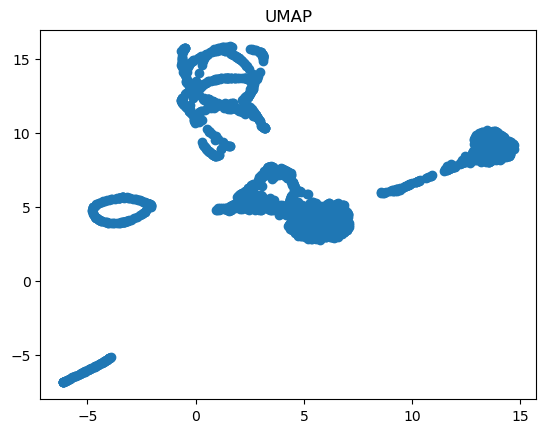

In [352]:
#using UMAP
umap = umap.UMAP()
df_umap = umap.fit_transform(df_scaled)

plt.scatter(df_umap[:,0], df_umap[:,1])
plt.title("UMAP")
plt.show()

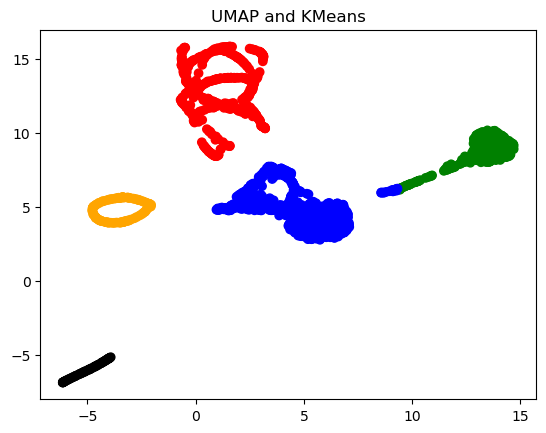

In [353]:
#UMAP and KMEANS
umap_kmean_model = KMeans(n_clusters = 5)
umap_kmean_model.fit(df_umap)
umap_kmean_labels = umap_kmean_model.labels_
#centroids = pacmap_kmean_model.cluster_centers_
#print(pacmap_kmean_labels)

# colors for plotting
umap_kmeans_colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','teal','silver', 'yellow','purple','pink']
# assign a color to each features (note that we are using features as target)
umap_kmeans_features_colors = [ umap_kmeans_colors[umap_kmean_labels[i]] for i in range(len(df_umap)) ]

plt.scatter(df_umap[:,0], df_umap[:,1],c=umap_kmeans_features_colors,marker='o')
plt.title("UMAP and KMeans")
plt.show()

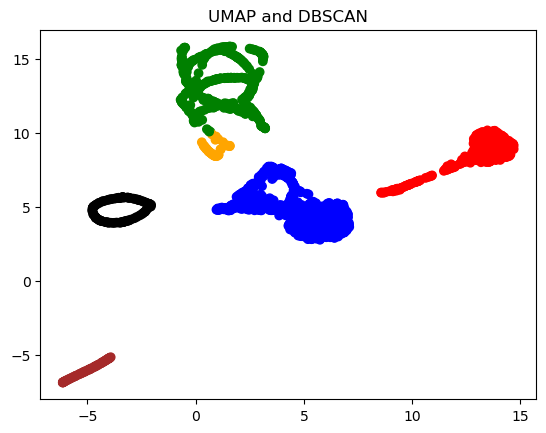

In [354]:
#UMAP and DBSCAN
umap_dbscan_model = DBSCAN(eps = 1, min_samples = 25)
umap_dbscan_model.fit(df_umap)
umap_dbscan_labels = umap_dbscan_model.labels_
#centroids = pacmap_dbscan_model.cluster_centers_
#print(umap_dbscan_labels)

# colors for plotting
umap_dbscan_colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','teal','silver', 'yellow','purple','pink']
# assign a color to each features (note that we are using features as target)
umap_dbscan_features_colors = [ umap_dbscan_colors[umap_dbscan_labels[i]] for i in range(len(df_umap)) ]

plt.scatter(df_umap[:,0], df_umap[:,1],c=umap_dbscan_features_colors,marker='o')
plt.title("UMAP and DBSCAN")
plt.show()

Text(0.5, 1.0, 'UMAP and Birch')

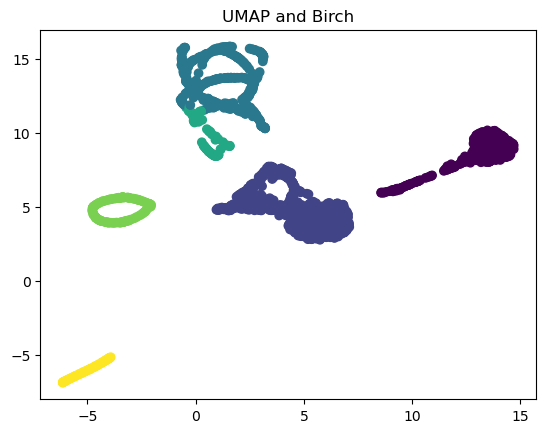

In [355]:
#UMAP and Birch
umap_birch_model = Birch(branching_factor = 20, n_clusters = None, threshold = 4)
umap_birch_model.fit(df_umap)
umap_birch_labels = umap_birch_model.labels_
umap_birch_pred = umap_birch_model.predict(df_umap)
plt.scatter(df_umap[:, 0], df_umap[:, 1], c = umap_birch_pred)
plt.title("UMAP and Birch")